# Ollama Python Library

In [1]:
import ollama
import pprint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme()

## Phi-3-Mini・Llama3

### chat

In [2]:
response = ollama.chat(model='phi3', messages=[
  {
    'role': 'user',
    'content': 'What is DeepLearning? Please answer within 20-words'
  },
])

print(response['message']['content'])

 Deep Learning is a subset of machine learning using neural networks with multiple layers, enabling complex pattern recognition and decision making.


In [3]:
response = ollama.chat(model='phi3', messages=[
  {
    'role': 'user',
    'content': 'What is Neural Network? Please answer within 25-words'
  },
])

print(response['message']['content'])

 A neural network is a computational system inspired by biological neurons, used to model complex patterns and make decisions based on data inputs.


### list

In [4]:
response = ollama.list()

print(response["models"][1]["name"])
print()
pprint.pp(response["models"][1]["details"])

mxbai-embed-large:latest

{'parent_model': '',
 'format': 'gguf',
 'family': 'bert',
 'families': ['bert'],
 'parameter_size': '334M',
 'quantization_level': 'F16'}


### embeddings

In [5]:
response = ollama.embeddings(model='phi3', prompt='The sky is blue because of rayleigh scattering')

res_np = np.array(response['embedding'])

print(len(response['embedding']))
print(response['embedding'][:10])
print(np.mean(res_np), np.sqrt(np.sum((res_np-np.mean(res_np))**2)/res_np.shape[0]))

3072
[-0.5512142777442932, 1.5065734386444092, 0.7478373050689697, 1.1350247859954834, 1.7609974145889282, 0.8029263019561768, -1.0324945449829102, 0.1570369005203247, 0.9840261936187744, 0.465870201587677]
-0.018035829757735655 0.9121263893203622


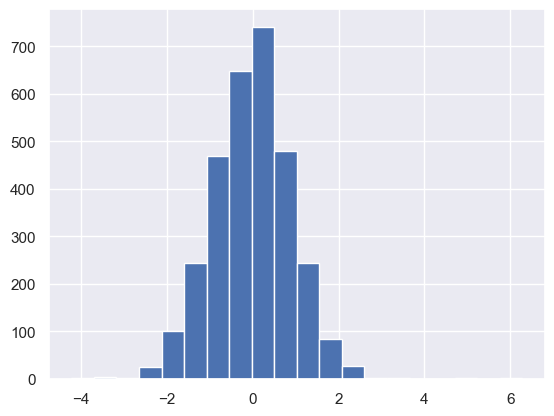

In [6]:
response = ollama.embeddings(model='phi3', prompt='The sky is blue because of rayleigh scattering')

res_np = np.array(response['embedding'])

plt.hist(res_np, bins=20)
plt.show()

In [7]:
response = ollama.embeddings(model='llama3', prompt='The sky is blue because of rayleigh scattering')

print(len(response['embedding']))

4096


In [8]:
response = ollama.embeddings(model='mxbai-embed-large', prompt='The sky is blue because of rayleigh scattering')

print(len(response['embedding']))

1024


## LLaVA

In [9]:
res = ollama.chat(
	model="llava",
	messages=[
		{
			'role': 'user',
			'content': 'Describe this image:',
			'images': ['./ollama_logo.png']
		}
	]
)

print(res['message']['content'])

 The image features a simple, yet cute, line drawing of an alpaca. It's a solid white color with black lines to define the shape and details. The alpaca is drawn in a cartoon style, giving it a friendly and approachable look. It's looking directly at the viewer, making the image feel like a direct engagement with the viewer. The background of the image is plain and does not distract from the main subject - the adorable little alpaca. 
